<a href="https://colab.research.google.com/github/Alex-El/Kinect1414_research/blob/main/pgm_analysis_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pgm file analysis

Kinect 1414 makes it possible to get an rgb image of 640x480 pixels and a pgm image of the same size, where each pixel indicates the distance to the object.

http://netpbm.sourceforge.net/doc/pgm.html

An attempt to build a 3D model from these two frames leads to failure.

Below is an analysis of the pgm file, which gives an understanding of the essence of the problem:

In [5]:
import numpy as np
import pandas as pd
 
from PIL import Image 
import plotly.express as px
import plotly.graph_objects as go

In [6]:
# for my colab
path = '/content/drive/MyDrive/Colab_Notebooks/3D/research/one_frame/registration_test_depth_mm.pgm'

In [7]:
# the function reads pgm and returns an array of numbers
def read_pgm(path):
    pgmf = open(path, 'rb')
    format, width, height, depth = pgmf.readline().split()
    width = int(width)
    height = int(height)
    depth = int(depth)

    raster = []
    for y in range(height):
        row = []
        for y in range(width):
            row.append(ord(pgmf.read(1)))
        raster.append(row)
    return raster

In [8]:
# get the array
lines_int = read_pgm(path)

In [9]:
# array to numpy
lines_int_np = np.array(lines_int)
lines_int_np

array([[153,   4, 153, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [153,   4, 157, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [182,   4, 186, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [10]:
# number of non-zero values
(lines_int_np > 0).astype(int).sum()

238978

This file gave cloud -> PointCloud with 7335 points. The number of points does not match the number of non-zero values.

## 3D view

The depth in mm is determined by the number in the lines_int_np array

For graphic interpretation, we will divide the 640 x 480 array into 64 x 48 fragments.Total 100 pieces with coordinates h and w

In [11]:
# convert data to pandas dataframe
df_lines_int = pd.DataFrame(lines_int_np)

In [12]:
# Fragment rendering function w, h <10
def show_fragment(df, w, h):
    df_fragm = df.copy()
    # cat the cols (w)
    if w != 1:
        df_fragm.drop(range(0, w*64-64), axis=1, inplace=True)
    if w != 10:
        df_fragm.drop(range(w*64, 640), axis=1, inplace=True)
    # cat the rows (h)
    if h != 1:
        df_fragm.drop(range(0, h*48-48), axis=0, inplace=True)
    if h != 10:
        df_fragm.drop(range(h*48, 480), axis=0, inplace=True)

    print('Shape:', df_fragm.shape)

    # render
    fig = go.Figure(data=[go.Surface(z=df_fragm.values)])

    fig.update_layout(title=f'Фрагмент w={w} h={h}', autosize=False,
                    width=1000, height=800,
                    margin=dict(l=65, r=50, b=65, t=90))
    fig.show()

In [13]:
show_fragment(df_lines_int, w=5, h=5)

Shape: (48, 64)


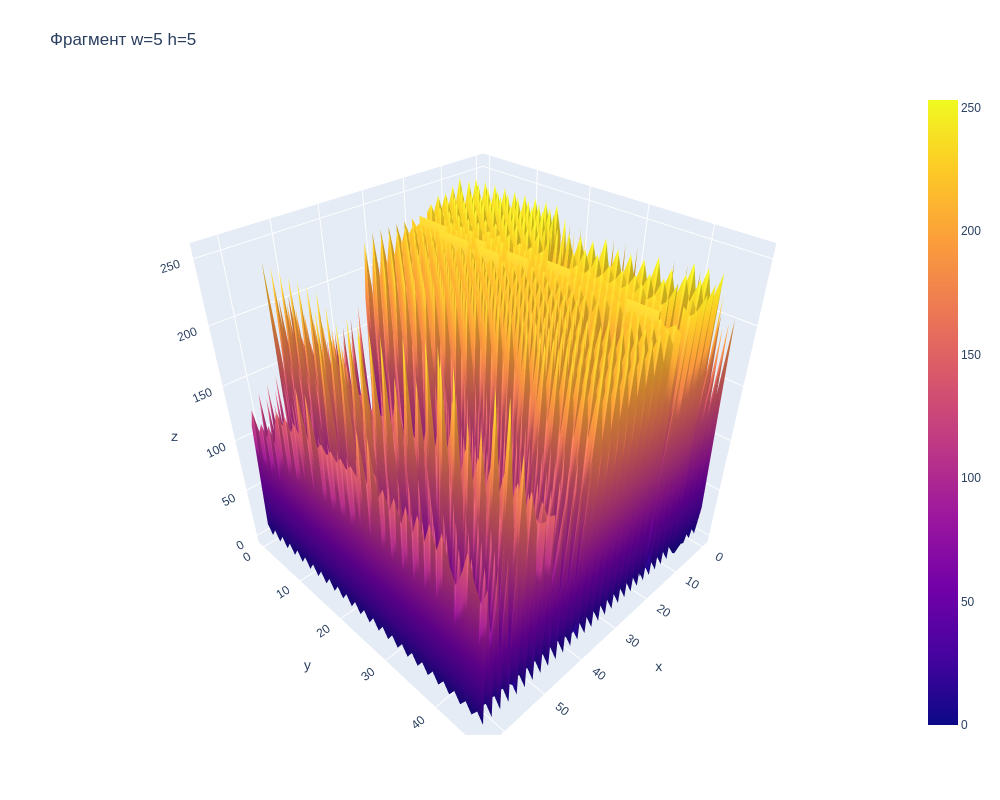

We observe the alternation of depth values with zeros. This is due to the fact that a single frame of depth measurement does not provide enough data for building a model.

Several frames need to be approximated.



---

